# Neural Networks notes for Self Driving Car

## Neuron

We started by a neuron, where the neuron has a list of _n_ inputs, each with it's weight, a bias and an output:

$$ o = \sum_{i=1}^n {w_i*x_i} + b $$

## Layer

Then we moved to the *Layer* concept: a Layer is a level of _k_ neurons all with the same inputs, so
_n_ inputs and _k_ outputs

Inputs nodes are modeled as a _1_ by _n_ matrix

$$ X = \left[x_{1} \ldots x_{n} \right] $$

Weights are a matrix: a row for for every input and columns for every output.

$$ W = \left[\begin{matrix}
    w_{1,1} & \ldots & w_{1,k}\\
    \vdots & \ddots & \vdots \\
    w_{n,1} & \ldots & w_{n,k}\\
\end{matrix}\right]$$

the biases are again a vector, with one value per output:

$$ b = \left[ b_1 \dots b_k \right] $$

## Batches

But normally we deal with _batches_ of inputs, to improve parallelism.
We deal with batches of size _m_ (trying to comfortably fit in memory)

So _X_ with _m_ examples of _n_ inputs is
$$ X = \left[\begin{matrix}
    x_{1,1} & \ldots & x_{1,n} \\
    \vdots & \ddots & \vdots \\
    x_{m,1} & \ldots & x_{m,n}
\end{matrix}\right]$$

_W_ and _b_ stay the same, they are applied to all the batch.

The batches-layer equation is now:
$$ Z = XW + b $$

### Sigmoid

Sigmoid is a function to make discontinuity derivable:
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

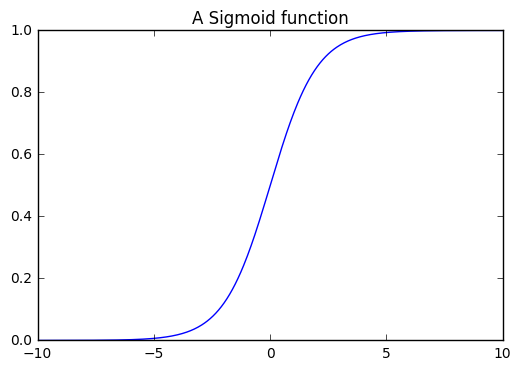

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

x = np.linspace(-10, 10, 500)
plt.plot(x, 1 / (1 + np.e ** (-x)))
plt.title('A Sigmoid function')

# Optimizer

## MSE mean squared error

$$ C(w, b) = \frac{1}{ m } \sum_x ( y(x) - a)^2 $$

## Cross entropy

$$D(S, L) = -\sum{L_i log(S_i)} $$
S= Softmax ($\frac{e^x}{\sum e^x}$), L=Onehot encoded labels


In [1]:
# A tensorflow example: compute cross entropy
import tensorflow as tf

softmax_data = [0.7, 0.2, 0.1]
one_hot_data = [1.0, 0.0, 0.0]

softmax = tf.placeholder(tf.float32)
one_hot = tf.placeholder(tf.float32)

cross_entropy = - tf.reduce_sum( tf.mul(one_hot, tf.log(softmax)) )

with tf.Session() as sess:
    output = sess.run(cross_entropy, feed_dict={softmax:softmax_data, one_hot:one_hot_data})
    print (output)

0.356675



## Gradient descend

Given the gradient of a function (it's derivative), we change the future $x$ generation as
$$ x = x - gradient * learning\_rate $$

## Stochastic gradient descend (SDG)

In practice, because computing the gradient is expensive (the derivative),
we adjust the network using instead a small subset of the inputs, and calculating the gradient on them... but many more times.

### Momentum and learning rate decay
Because the approximation is usually quite bad, we can keep a running average of the direction of the approximated gradient descend, and use that to move out input (momentum).

Another trick is to reduce the learning rate going on with the generations.

ADAGRAD is a modification of SDG that does momentum and LRD for us


# Avoid overfitting

* Use larger datasets
* Validate the data with an unused subset of your data
* **Dropout**: randomly drop half of the signals and boost the others
      keep_prob = tf.placeholder(tf.float32)
      tf.nn.dropout(hidden_layer, keep_prob)
  remember to use dropout in the training phase, not during validation

## Optimization suggestions

Try to keep variables with 0 mean ($X_i = 0$) and variance 1 ($X_i = X_j$)

For Weights it means choose them from standard distribution (tf, a small $\sigma$)

# Convolutional Neural Network (CNN)

It works by taking the input matrix and filter it in smaller *patches*, each moving of an amount called *strive*.

Every patch is connected with the next level, a layer wide *k*

## CCN dimensionality

Given our input layer has a volume of W

Our filter has a volume F = ($height * width * depth$)
with a stride of S, and a padding of P

The following formula gives us the volume of the next layer:
$$ (W−F+2P)/S+1 $$
(with padding='VALID', with padding='SAME', it simplify to W/S)

### Summary
The input is 4D:

`X = [batch_size, width, height, depth]`

for every level we train a 4D array 

`W = [filterWidth, filter_height, input_depth, output_depth]`

and a bias 1D

`B = [output_depth]`

## Polling
With this technique instead of taking all the values of a patch we take just the max (or average, depending)
In this way we avoid overfitting (reducing the number of parameters). Recently Dropout is more used, as it's more efficient for avoiding overfitting.

## 1x1 convolutions
Put in front of the patch to create little inexpensive neural networks: more deep and with more parameters